### 🔎 텍스트 유사도 (Text Similarity)
<br>
- 텍스트가 얼마나 유사한지 판단하는 것<br>
<br>
- 유사도 측정방법<br>
1) 단어 개수 빈도 체크<br>
2) 형태소로 나눠 형태소 비교<br>
3) 자소 단위로 나눠 단어를 비교하는 방법<br>
<br>
#### Deep Learning  기반 텍스트 유사도 측정 <br>
1) 텍스트를 벡터화<br>
2) 벡터화된 각 문장 간의 유사도를 측정하는 방식으로 진행 됨<br>
<br>
#### 자주 쓰이는 유사도 4가지 측정방법<br>
1) `자카드` 유사도<br>
2) `유클리디언` 유사도<br>
3) `맨해튼` 유사도<br>
4) `코사인` 유사도<br>

#### TF-IDF (Team Frequency - Inverse Document Frequency)

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 내가 만든 문장

sentence =("휴일인 오늘도 비가 와서 많은 사람들이 외출을 안 하고 집에서 쉴 것으로 보입니다.",
          "사람들은 아무도 오늘 비가 올지 예상하지 못했다. 기상청은 강한 바람과 많은 양의 비가 온다고 예보했다.")

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(sentence) #벡터화할 문장 넣어주기

idf = tfidf_vectorizer.idf_
print(dict(zip(tfidf_vectorizer.get_feature_names(), idf))) # 각 수치에 대한 시각화

{'강한': 1.4054651081081644, '것으로': 1.4054651081081644, '기상청은': 1.4054651081081644, '많은': 1.0, '못했다': 1.4054651081081644, '바람과': 1.4054651081081644, '보입니다': 1.4054651081081644, '비가': 1.0, '사람들은': 1.4054651081081644, '사람들이': 1.4054651081081644, '아무도': 1.4054651081081644, '양의': 1.4054651081081644, '예보했다': 1.4054651081081644, '예상하지': 1.4054651081081644, '오늘': 1.4054651081081644, '오늘도': 1.4054651081081644, '온다고': 1.4054651081081644, '올지': 1.4054651081081644, '와서': 1.4054651081081644, '외출을': 1.4054651081081644, '집에서': 1.4054651081081644, '하고': 1.4054651081081644, '휴일인': 1.4054651081081644}


C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


#### TF-IDF 벡터화한 값은  자카드 유사도를 제외한 유사도 측정에 사용됨

#### 자카드 유사도는 벡터화 없이 바로 유사도 측정이 가능!

#### 1. `자카드 유사도`: 2개 문장을 각각 단어의 집합으로 만든 뒤 2개 집합을 통해 유사도를 측정하는 방식
- 교집합의 단어를 합집합 (전체 단어의 수)로 나누면 됨
- 공통 원소의 개수에 따라 0 ~ 1 값이 나오고, 1에 가까울 수록 유사도가 높다


A = {휴일,인,오늘,도,비,가,와서,많,은,사람,들,이,외출,을,안,하고,집,에서,쉴,것,으로,보입니다}<br>
B = {사람,들,은,아무도,오늘,비,가,올,지,예상,하,지,못했다,기상청,은,강한,바람,과,많,은,양,의,비,가,온다고,예보,했다}

자카드 유사도 = 8 / 35 = 0.228

#### 2. `코사인 유사도`:  사이킷런에서 유사도 측정함수 `cosine_similarity` import 해서 구할 수 있다.

- 내적공간의 두 벡터간 각도의 코사인값을 이용하여 측정된 벡터간의 유사한 정도를 의미한다. <br>
- 각도가 0°일 때의 코사인값은 1이며, 다른 모든 각도의 코사인값은 1보다 작다.<br>
- 공식: 
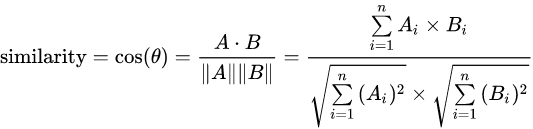

In [8]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2]) # 첫번째 문장과 두번째 문장 비교

array([[0.12590967]])

In [15]:
round(result[0][0], 2)

0.13

In [32]:
result = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])
print(f'코사인 유사도 값은 {round(result[0][0], 2)} 이며,')
print(f'유사 정도는 {round(result[0][0],2)*100} 점 입니다.')

코사인 유사도 값은 0.13 이며,
유사 정도는 13.0 점 입니다.


#### 3. `유클리디언 유사도`:  사이킷런에서 `euclidean_distances` import 해서 구할 수 있다.
 - `L2 거리`라고도 함<br>
 <br>
 - `위키피디아 설명 참조`
 - 직교 좌표계로 나타낸 점 p = (p1, p2,..., pn)와 q = (q1, q2,..., qn)가 있을 때, 
 - 두 유클리드 노름을 이용하여 두 점 p, q의 거리를 계산하면 다음과 같다.
 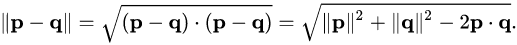


<br>
<br>
- 단순한 2개 점 사이의 거리를 뜻하기 때문에 양수로 제한이 없음<br>
- 앞의 유사도와 비교하기 위해 일반화 (L1_Normalize) 진행

In [17]:
from sklearn.metrics.pairwise import euclidean_distances

euclidean_distances(tfidf_matrix[0:1], tfidf_matrix[1:2]) # 첫번째 문장과 두번째 문장 비교

array([[1.32218783]])

In [20]:
result2 = euclidean_distances(tfidf_matrix[0:1], tfidf_matrix[1:2])
print(f'유클리디언 유사도 값은 {round(result2[0][0], 2)} 이며, 유사도는 {round(result2[0][0],2)*100} 점 입니다.')

유클리디언 유사도 값은 1.32 이며, 유사도는 132.0 점 입니다.


In [26]:
import numpy as np

def l1_normalize(v):
    norm = np.sum(v)
    return v / norm


tfidf_norm_l1 = l1_normalize(tfidf_matrix)
e_d = euclidean_distances(tfidf_norm_l1[0:1], tfidf_norm_l1[1:2])

####  4. `맨해튼 유사도`:  사이킷런에서 `manhattan_distances` import 해서 구할 수 있다.
 - `L1 거리`라고도 함<br>
 <br>
 - `위키피디아 설명 참조`: https://ko.wikipedia.org/wiki/%EB%A7%A8%ED%95%B4%ED%8A%BC_%EA%B1%B0%EB%A6%AC
 - 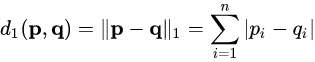 
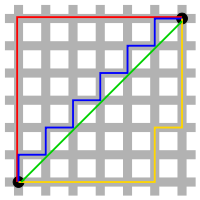


<br>
<br>
- 유클리디언 유사도와 마찬가지로 단순한 2개 점 사이의 거리를 뜻하기 때문에 양수로 제한이 없음<br>
- 앞의 유사도와 비교하기 위해 일반화 (L1_Normalize) 진행

In [27]:
from sklearn.metrics.pairwise import manhattan_distances

m_d = manhattan_distances(tfidf_norm_l1[0:1], tfidf_norm_l1[1:2])

### 문장 유사도 측정 결과

In [31]:
print('자카드 유사도 값:', 0.228)
print(f'코사인 유사도 값: {round(result[0][0], 2)}')
print(f'유클리디언 유사도 값: {np.round(e_d, 2)[0][0]}')
print(f'맨해튼 유사도 값: {np.round(m_d, 2)[0][0]}')

자카드 유사도 값: 0.228
코사인 유사도 값: 0.13
유클리디언 유사도 값: 0.19
맨해튼 유사도 값: 0.88


#### => 측정 방법에 따라 크게 유사도가 달라질 수 있으므로 의도하는 방향에 맞는 측정법 고르는 것이 중요